## Opinet - 셀프주유소가 정말 저렴할까?

In [1]:
import time
import pandas as pd
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys

##### 1. 셀레니움으로 서울시 구별 주유소 가격정보 얻기

In [2]:
# Opinet 초기화면 > 싼 주유소 찾기 > 지역별
url = 'https://www.opinet.co.kr/searRgSelect.do'
driver = webdriver.Chrome()
driver.get(url)
time.sleep(2)

In [3]:
# 광역시도에서 서울 입력
metro = driver.find_element(By.ID,'SIDO_NM0')
metro.send_keys('서울')

In [4]:
# 서울시 자치구 리스트 가져오기
sigungu = driver.find_element(By.ID, 'SIGUNGU_NM0')
gu_list = sigungu.find_elements(By.TAG_NAME, 'option')
gu_list[:3]

[<selenium.webdriver.remote.webelement.WebElement (session="a397ebb039d6434799114e41a7568124", element="DCC23967D580EEDA98ED29756CF4CBAC_element_86")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a397ebb039d6434799114e41a7568124", element="DCC23967D580EEDA98ED29756CF4CBAC_element_88")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a397ebb039d6434799114e41a7568124", element="DCC23967D580EEDA98ED29756CF4CBAC_element_90")>]

In [5]:
gu_list[0].text, gu_list[1].text

('시/군/구', '강남구')

In [6]:
gu_names = [gu.text for gu in gu_list[1:]]
gu_names[:3]

['강남구', '강동구', '강북구']

In [7]:
# 강남구 선택
sigungu.send_keys(gu_names[0])

In [8]:
# 엑셀 저장
driver.find_element(By.ID,'glopopd_excel').click()
time.sleep(2)

In [9]:
# 강남구를 제외한 나머지 자치구에 대해서 주유소 가격정보 엑셀 저장
for gu in gu_names[1:]:
    sigungu = driver.find_element(By.ID, 'SIGUNGU_NM0')
    sigungu.send_keys(gu)
    time.sleep(3)
    driver.find_element(By.ID,'glopopd_excel').click()
    time.sleep(3)

In [10]:
driver.close()

##### 2. 구별 휘발유 가격에 대한 정리

In [29]:
from glob import glob   # glob: 파일이 디렉토리에 여러개가 있을경우 사용
glob('c:/Users/human/Downloads/지역*.xls')

['c:/Users/human/Downloads\\지역_위치별(주유소) (1).xls',
 'c:/Users/human/Downloads\\지역_위치별(주유소) (10).xls',
 'c:/Users/human/Downloads\\지역_위치별(주유소) (11).xls',
 'c:/Users/human/Downloads\\지역_위치별(주유소) (12).xls',
 'c:/Users/human/Downloads\\지역_위치별(주유소) (13).xls',
 'c:/Users/human/Downloads\\지역_위치별(주유소) (14).xls',
 'c:/Users/human/Downloads\\지역_위치별(주유소) (15).xls',
 'c:/Users/human/Downloads\\지역_위치별(주유소) (16).xls',
 'c:/Users/human/Downloads\\지역_위치별(주유소) (17).xls',
 'c:/Users/human/Downloads\\지역_위치별(주유소) (18).xls',
 'c:/Users/human/Downloads\\지역_위치별(주유소) (19).xls',
 'c:/Users/human/Downloads\\지역_위치별(주유소) (2).xls',
 'c:/Users/human/Downloads\\지역_위치별(주유소) (20).xls',
 'c:/Users/human/Downloads\\지역_위치별(주유소) (21).xls',
 'c:/Users/human/Downloads\\지역_위치별(주유소) (22).xls',
 'c:/Users/human/Downloads\\지역_위치별(주유소) (23).xls',
 'c:/Users/human/Downloads\\지역_위치별(주유소) (24).xls',
 'c:/Users/human/Downloads\\지역_위치별(주유소) (3).xls',
 'c:/Users/human/Downloads\\지역_위치별(주유소) (4).xls',
 'c:/Users/human/Downloads\\지역_위치별(

In [30]:
# conda activate base; pip install xlrd
filename = 'c:/Users/human/Downloads/지역_위치별(주유소).xls'
df = pd.read_excel(filename, header=2)
df.head(3)

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,(주)보성 세곡주유소,서울 강남구 헌릉로 731 (세곡동),SK에너지,02-445-6870,Y,-,1769,1668,-
1,서울특별시,HD현대오일뱅크㈜직영 산성셀프주유소,서울 강남구 헌릉로 730,HD현대오일뱅크,02-2226-4963,Y,1978,1788,1688,-
2,서울특별시,삼성동주유소,서울 강남구 테헤란로 619 (삼성동),HD현대오일뱅크,02-508-6572,Y,2025,1795,1735,-


In [31]:
# 25개 파일을 읽어서 하나의 데이터프레임으로 만들기
df_list = []
for filename in glob('c:/Users/human/Downloads/지역*.xls'):
    df = pd.read_excel(filename, header=2)
    df_list.append(df)

In [32]:
df = pd.concat(df_list)
df.shape

(439, 10)

In [33]:
df = df[['상호', '주소', '휘발유', '셀프여부', '상표']]
df.rename(columns={'휘발유': '가격', '셀프여부': '셀프'}, inplace=True)
df.head()

,상호,주소,가격,셀프,상표
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1779,Y,HD현대오일뱅크
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1824,N,HD현대오일뱅크
2,(주)삼표에너지 고덕주유소,서울 강동구 고덕로 39 (암사동),1835,Y,GS칼텍스
3,(주)소모 신월주유소,서울 강동구 양재대로 1323 (성내동),1836,Y,GS칼텍스
4,대성석유(주)길동주유소,서울 강동구 천호대로 1168,1846,N,GS칼텍스


In [16]:
df.tail()       # 여러 엑셀을 합쳐서 index가 정리가 안된 상태

,상호,주소,가격,셀프,상표
29,갤러리아주유소,서울 강남구 압구정로 426,2330,N,SK에너지
30,㈜새서울석유 새서울주유소,서울 강남구 압구정로 154,2348,N,HD현대오일뱅크
31,SK논현주유소,서울 강남구 논현로 747 (논현동),2390,N,SK에너지
32,(주)제이제이네트웍스 제이제이주유소,서울 강남구 언주로 716,2560,N,HD현대오일뱅크
33,(주)만정에너지 삼보주유소,서울 강남구 봉은사로 433 (삼성동),2598,N,GS칼텍스


In [34]:
df.set_index('상호', inplace=True)      #상호를 인덱스로 지정
df.reset_index(inplace=True)
df.tail()

,상호,주소,가격,셀프,상표
434,갤러리아주유소,서울 강남구 압구정로 426,2330,N,SK에너지
435,㈜새서울석유 새서울주유소,서울 강남구 압구정로 154,2348,N,HD현대오일뱅크
436,SK논현주유소,서울 강남구 논현로 747 (논현동),2390,N,SK에너지
437,(주)제이제이네트웍스 제이제이주유소,서울 강남구 언주로 716,2560,N,HD현대오일뱅크
438,(주)만정에너지 삼보주유소,서울 강남구 봉은사로 433 (삼성동),2598,N,GS칼텍스


In [35]:
df['구'] = df.주소.apply(lambda x: x.split()[1])
df.head()

,상호,주소,가격,셀프,상표,구
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1779,Y,HD현대오일뱅크,강동구
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1824,N,HD현대오일뱅크,강동구
2,(주)삼표에너지 고덕주유소,서울 강동구 고덕로 39 (암사동),1835,Y,GS칼텍스,강동구
3,(주)소모 신월주유소,서울 강동구 양재대로 1323 (성내동),1836,Y,GS칼텍스,강동구
4,대성석유(주)길동주유소,서울 강동구 천호대로 1168,1846,N,GS칼텍스,강동구


In [36]:
df.구.unique()

array(['강동구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '강북구', '용산구', '은평구', '종로구', '중구', '중랑구', '강서구',
       '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '강남구'], dtype=object)

In [37]:
# 가격의 타입 확인
type(df.가격[0])

numpy.int64

In [38]:
df.to_csv('data/Opinet_20230919.csv', index=False)
pd.read_csv('data/Opinet_20230919.csv').tail()

,상호,주소,가격,셀프,상표,구
434,갤러리아주유소,서울 강남구 압구정로 426,2330,N,SK에너지,강남구
435,㈜새서울석유 새서울주유소,서울 강남구 압구정로 154,2348,N,HD현대오일뱅크,강남구
436,SK논현주유소,서울 강남구 논현로 747 (논현동),2390,N,SK에너지,강남구
437,(주)제이제이네트웍스 제이제이주유소,서울 강남구 언주로 716,2560,N,HD현대오일뱅크,강남구
438,(주)만정에너지 삼보주유소,서울 강남구 봉은사로 433 (삼성동),2598,N,GS칼텍스,강남구


##### 3. 셀프주유소가 정말 저렴할까?

In [39]:
df.pivot_table('가격','셀프',aggfunc=['count','mean', 'min', 'max', 'std', 'var'])

,count,mean,min,max,std,var
,가격,가격,가격,가격,가격,가격
셀프,,,,,,
N,172,1948.372093,1694,2776,217.620387,47358.632667
Y,267,1800.925094,1724,2278,54.626775,2984.084594


- 셀프 여부에 따른 가격의 Boxplot

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False 

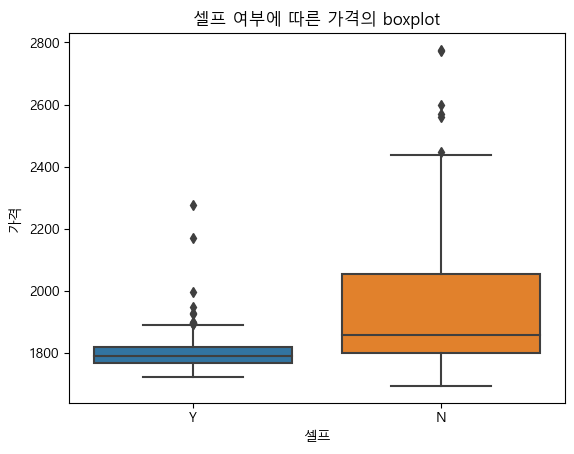

In [40]:
sns.boxplot(df, x='셀프', y='가격')
plt.title('셀프 여부에 따른 가격의 boxplot');

- 가설검정 (2-sample T test)

In [41]:
import scipy as sp
sp.stats.ttest_ind(df[df.셀프=='Y'].가격, df[df.셀프=='N'].가격, equal_var=False)

Ttest_indResult(statistic=-8.710850568947652, pvalue=1.6733753870177818e-15)

In [27]:
# p-value가 0.05보다 훨씬 작으므로 귀무가설 기각, 대립가설 채택
# - 귀무가설(H0): 셀프주유소와 일반주유소의 가격차이가 없다.
# - 대립가설(H1,Ha): 셀프주유소와 일반주유소의 가격차이가 있다.

- 상표별로 가격 비교하기

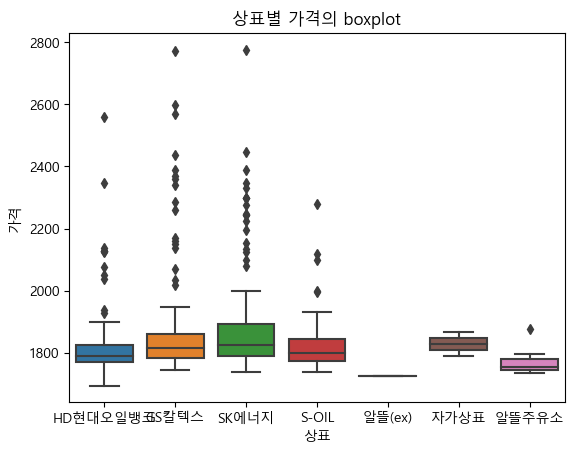

In [42]:
sns.boxplot(df, x='상표', y='가격')
plt.title('상표별 가격의 boxplot');

In [109]:
brand_price = df.pivot_table('가격','상표')
brand_price.sort_values(by='가격',ascending=False)

,가격
상표,
SK에너지,1892.116279
GS칼텍스,1888.116505
자가상표,1828.000000
S-OIL,1827.141026
HD현대오일뱅크,1825.982759
알뜰주유소,1769.700000
알뜰(ex),1724.000000


In [110]:
df_brand = pd.DataFrame(brand_price)
df_brand

,가격
상표,
GS칼텍스,1888.116505
HD현대오일뱅크,1825.982759
S-OIL,1827.141026
SK에너지,1892.116279
알뜰(ex),1724.000000
알뜰주유소,1769.700000
자가상표,1828.000000


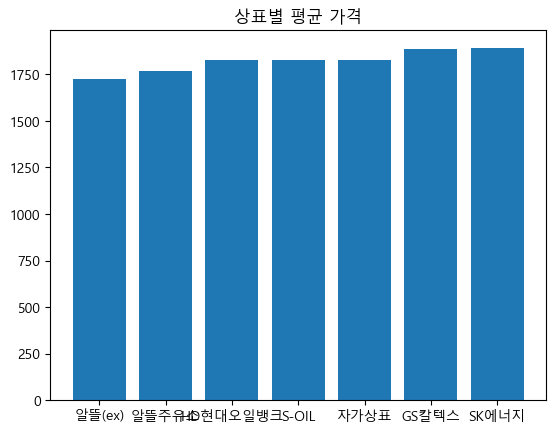

In [113]:
# 상표별 평균 가격의 막대그래프
brand = df_brand['가격'].sort_values()
plt.bar(brand.index, brand.values)
plt.title('상표별 평균 가격');


In [95]:
gu_price = df.pivot_table('가격','구')
gu_price.sort_values(by='가격',ascending=False)

,가격
구,
용산구,2239.916667
중구,2153.300000
종로구,2086.222222
강남구,2022.941176
성동구,1921.187500
강동구,1882.500000
마포구,1851.181818
영등포구,1850.538462
서초구,1839.200000


In [114]:
df_gu = pd.DataFrame(gu_price)
df_gu

,가격
구,
강남구,2022.941176
강동구,1882.500000
강북구,1784.666667
강서구,1811.484848
관악구,1826.642857
광진구,1802.538462
구로구,1828.894737
금천구,1795.363636
노원구,1804.071429


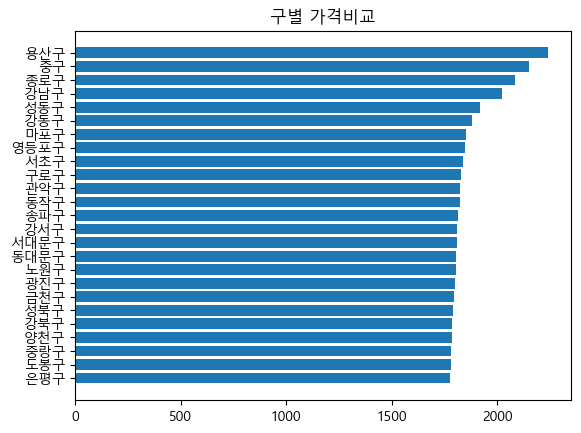

In [115]:
# 구별 가격 비교
gu = df_gu['가격'].sort_values()
plt.barh(gu.index, gu.values)
plt.title('구별 가격비교');